In [ ]:
# Cargar las librerías necesarias
if (!require('caret')) install.packages('caret')
if (!require('e1071')) install.packages('e1071')
if (!require('pROC')) install.packages('pROC')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
if (!require('readxl')) install.packages('readxl')

In [ ]:
set.seed(159)


df <- read_excel("/content/caso1a.xlsx")
str(df)



tibble [7,260 × 5] (S3: tbl_df/tbl/data.frame)
 $ Genero        : chr [1:7260] "FEMENINO" "FEMENINO" "MASCULINO" "FEMENINO" ...
 $ estadocivil   : chr [1:7260] "VIUDO" "CASADO" "SOLTERO" "SOLTERO" ...
 $ edad          : chr [1:7260] "51 - 60" "41 - 50" "41 - 50" "31 - 40" ...
 $ ViviendaPropia: chr [1:7260] "NO" "SI" "NO" "NO APLICA" ...
 $ compra        : chr [1:7260] "no" "no" "no" "si" ...


In [ ]:
#genero entrenamiento y validacion para cereal
set.seed(159)
sample <- sample.int(nrow(df), floor(.5*nrow(df)))
train_data <- df[sample, ]
test_data <- df[-sample, ]

train_data$compra <- as.factor(train_data$compra)
test_data$compra <- as.factor(test_data$compra)


In [ ]:

naive_model <- naiveBayes(compra ~ ., data = train_data)

In [ ]:
#guarda las probabilidades (para curva ROC)
prednaiveprob<-predict(naive_model, test_data, type="raw")

In [ ]:
umbrales <- c(0.1,0.4,0.5, 0.6,0.7, 0.8)
for (umbral in umbrales) {
  # Predict class labels based on the threshold
  pred_naive <- ifelse(prednaiveprob[, 1] > umbral, 'no', 'si')
  # Convert predictions to factors with the correct levels
  pred_naive <- factor(pred_naive, levels = levels(test_data$compra))


  cat("Resultados para umbral de probabilidad =", umbral, ":\n")
  conf <- confusionMatrix(pred_naive, test_data$compra)
  print(conf$table)
  print(conf$byClass)
}

Resultados para umbral de probabilidad = 0.4 :
          Reference
Prediction   no   si
        no 2192  885
        si  201  352
         Sensitivity          Specificity       Pos Pred Value 
           0.9160050            0.2845594            0.7123822 
      Neg Pred Value            Precision               Recall 
           0.6365280            0.7123822            0.9160050 
                  F1           Prevalence       Detection Rate 
           0.8014625            0.6592287            0.6038567 
Detection Prevalence    Balanced Accuracy 
           0.8476584            0.6002822 
Resultados para umbral de probabilidad = 0.6 :
          Reference
Prediction   no   si
        no 1847  516
        si  546  721
         Sensitivity          Specificity       Pos Pred Value 
           0.7718345            0.5828618            0.7816335 
      Neg Pred Value            Precision               Recall 
           0.5690608            0.7816335            0.7718345 
              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC = 0.7358982 


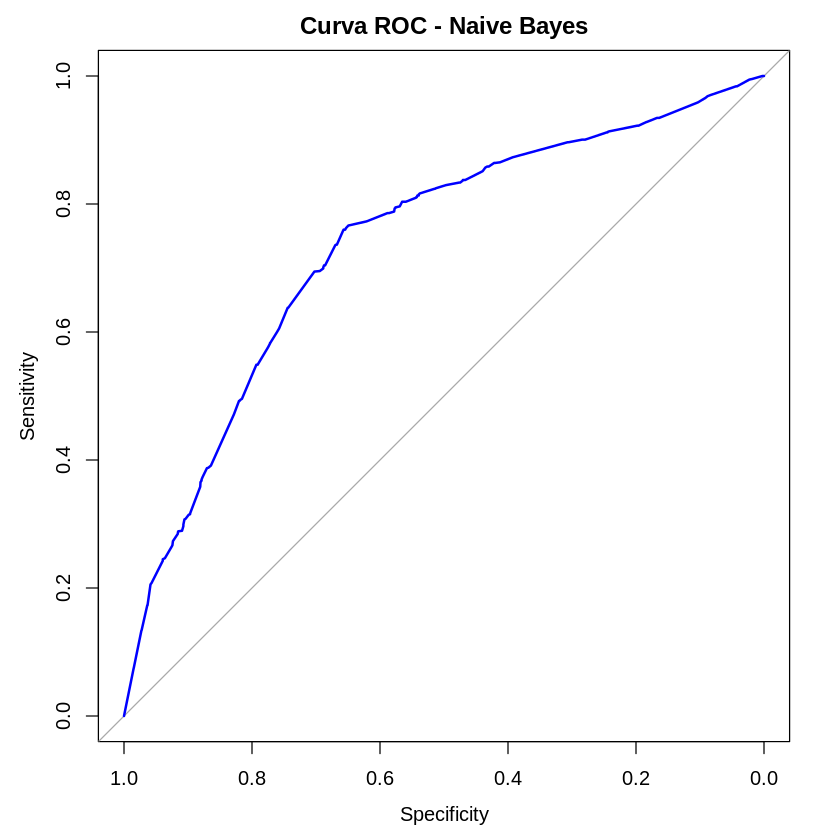

In [ ]:

library(pROC)
roc_curve <- roc(as.numeric(test_data$compra == 'si'), prednaiveprob[, 2])
plot(roc_curve, col = "blue", main = "Curva ROC - Naive Bayes")
auc_value <- auc(roc_curve)
cat("AUC =", auc_value, "\n")